In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_csv('ALL_output_17ii.csv')
df = df[df['code'].isin(['A','B','C','D-E','F','G','H','I','J','K','L','M-N','O-U','TOT'])]

df.head()

,country,var,code,_1970,_1971,_1972,_1973,_1974,_1975,_1976,...,_2006,_2007,_2008,_2009,_2010,_2011,_2012,_2013,_2014,_2015
0,AT,VA,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,237683.2,251926.6,260533.0,254762.6,262311.7,274852.3,281955.9,287194.6,294442.6,302653.1
2,AT,VA,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3494.2,4029.8,3946.8,3306.1,3761.9,4427.7,4330.3,4124.1,4033.7,3905.4
3,AT,VA,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1058.5,986.7,1345.3,1076.4,1179.3,1502.7,1515.9,1482.8,1452.6,1182.7
4,AT,VA,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47702.3,51524.0,51051.5,47034.5,48983.1,51580.7,53382.5,53554.3,54581.6,57220.9
16,AT,VA,D-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7574.5,7710.9,7937.8,8097.6,7970.3,7874.8,8250.0,8501.6,8211.9,7959.8


In [2]:
data = df.groupby(['country','var','code']).mean().stack().reset_index().rename(columns={'level_3':'year',0:'value'})
data['year'] = data['year'].str[1:].astype(int)
data['month'] = 1
data['day'] = 1
data['date'] = pd.to_datetime(data[['year','month','day']])

data

,country,var,code,year,value,month,day,date
0,AT,CAP,A,1995,-2.851685e+03,1,1,1995-01-01
1,AT,CAP,A,1996,-3.182050e+03,1,1,1996-01-01
2,AT,CAP,A,1997,-3.289061e+03,1,1,1997-01-01
3,AT,CAP,A,1998,-3.254093e+03,1,1,1998-01-01
4,AT,CAP,A,1999,-3.199597e+03,1,1,1999-01-01
...,...,...,...,...,...,...,...,...
271097,US,VA_QI,TOT,2011,1.491676e+07,1,1,2011-01-01
271098,US,VA_QI,TOT,2012,1.515122e+07,1,1,2012-01-01
271099,US,VA_QI,TOT,2013,1.534927e+07,1,1,2013-01-01
271100,US,VA_QI,TOT,2014,1.562338e+07,1,1,2014-01-01


Text(0.5, 1.0, 'Growth in real manufacturing value added 1995-2015')

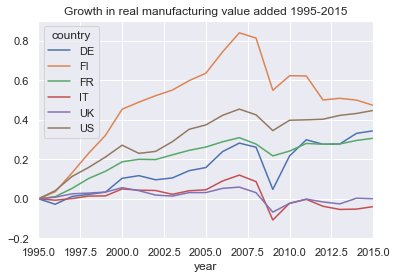

In [21]:
data = data[data['country'].isin(['US','UK','DE','FR','FI','IT','DK'])]
va = pd.pivot_table(data.loc[(data['code']=='C')&(data['var']=='VA_QI')],index='year',columns='country',values='value')


va = np.log(va/va.loc[1995])

va.plot()
plt.axis([1995,2015,-0.2,0.9])
plt.title('Growth in real manufacturing value added 1995-2015')